In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [18]:
df = pd.read_csv('data\\processed\\marketing_campaign_final.csv')

df.drop(columns=['ID'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PC1                 2029 non-null   float64
 1   PC2                 2029 non-null   float64
 2   PC3                 2029 non-null   float64
 3   Age                 2029 non-null   float64
 4   Income              2029 non-null   float64
 5   Total_Spending      2029 non-null   float64
 6   Has_Children        2029 non-null   int64  
 7   Customer_Seniority  2029 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 126.9 KB


## Visualisation des clusters trouvés par k-means . 
## Non concluant ❌ ( car forme non sphérique )

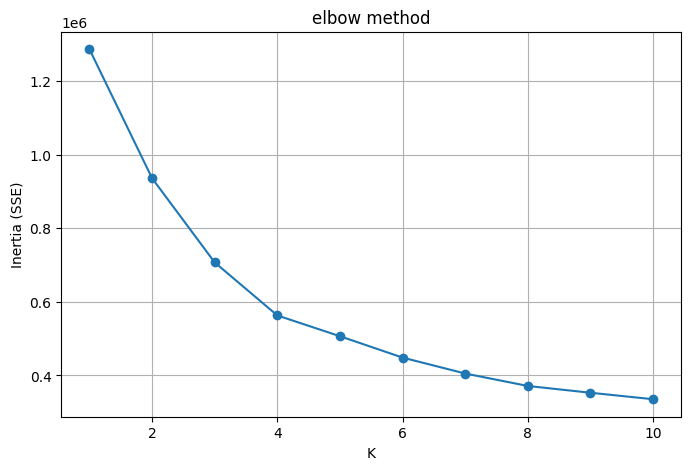

In [19]:
inertias = []

# Tester de K = 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("elbow method")
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

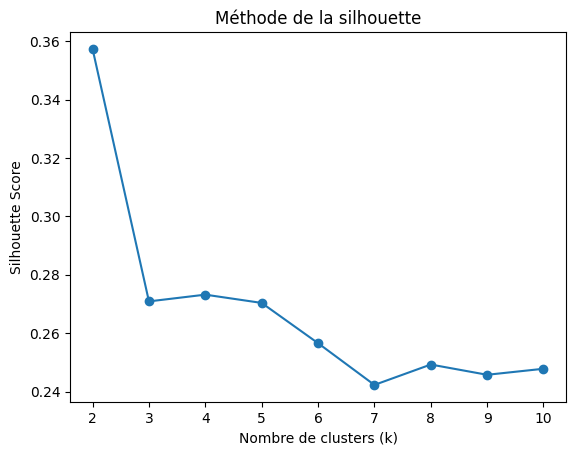

In [32]:
from sklearn.metrics import silhouette_score



silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode de la silhouette")
plt.show()

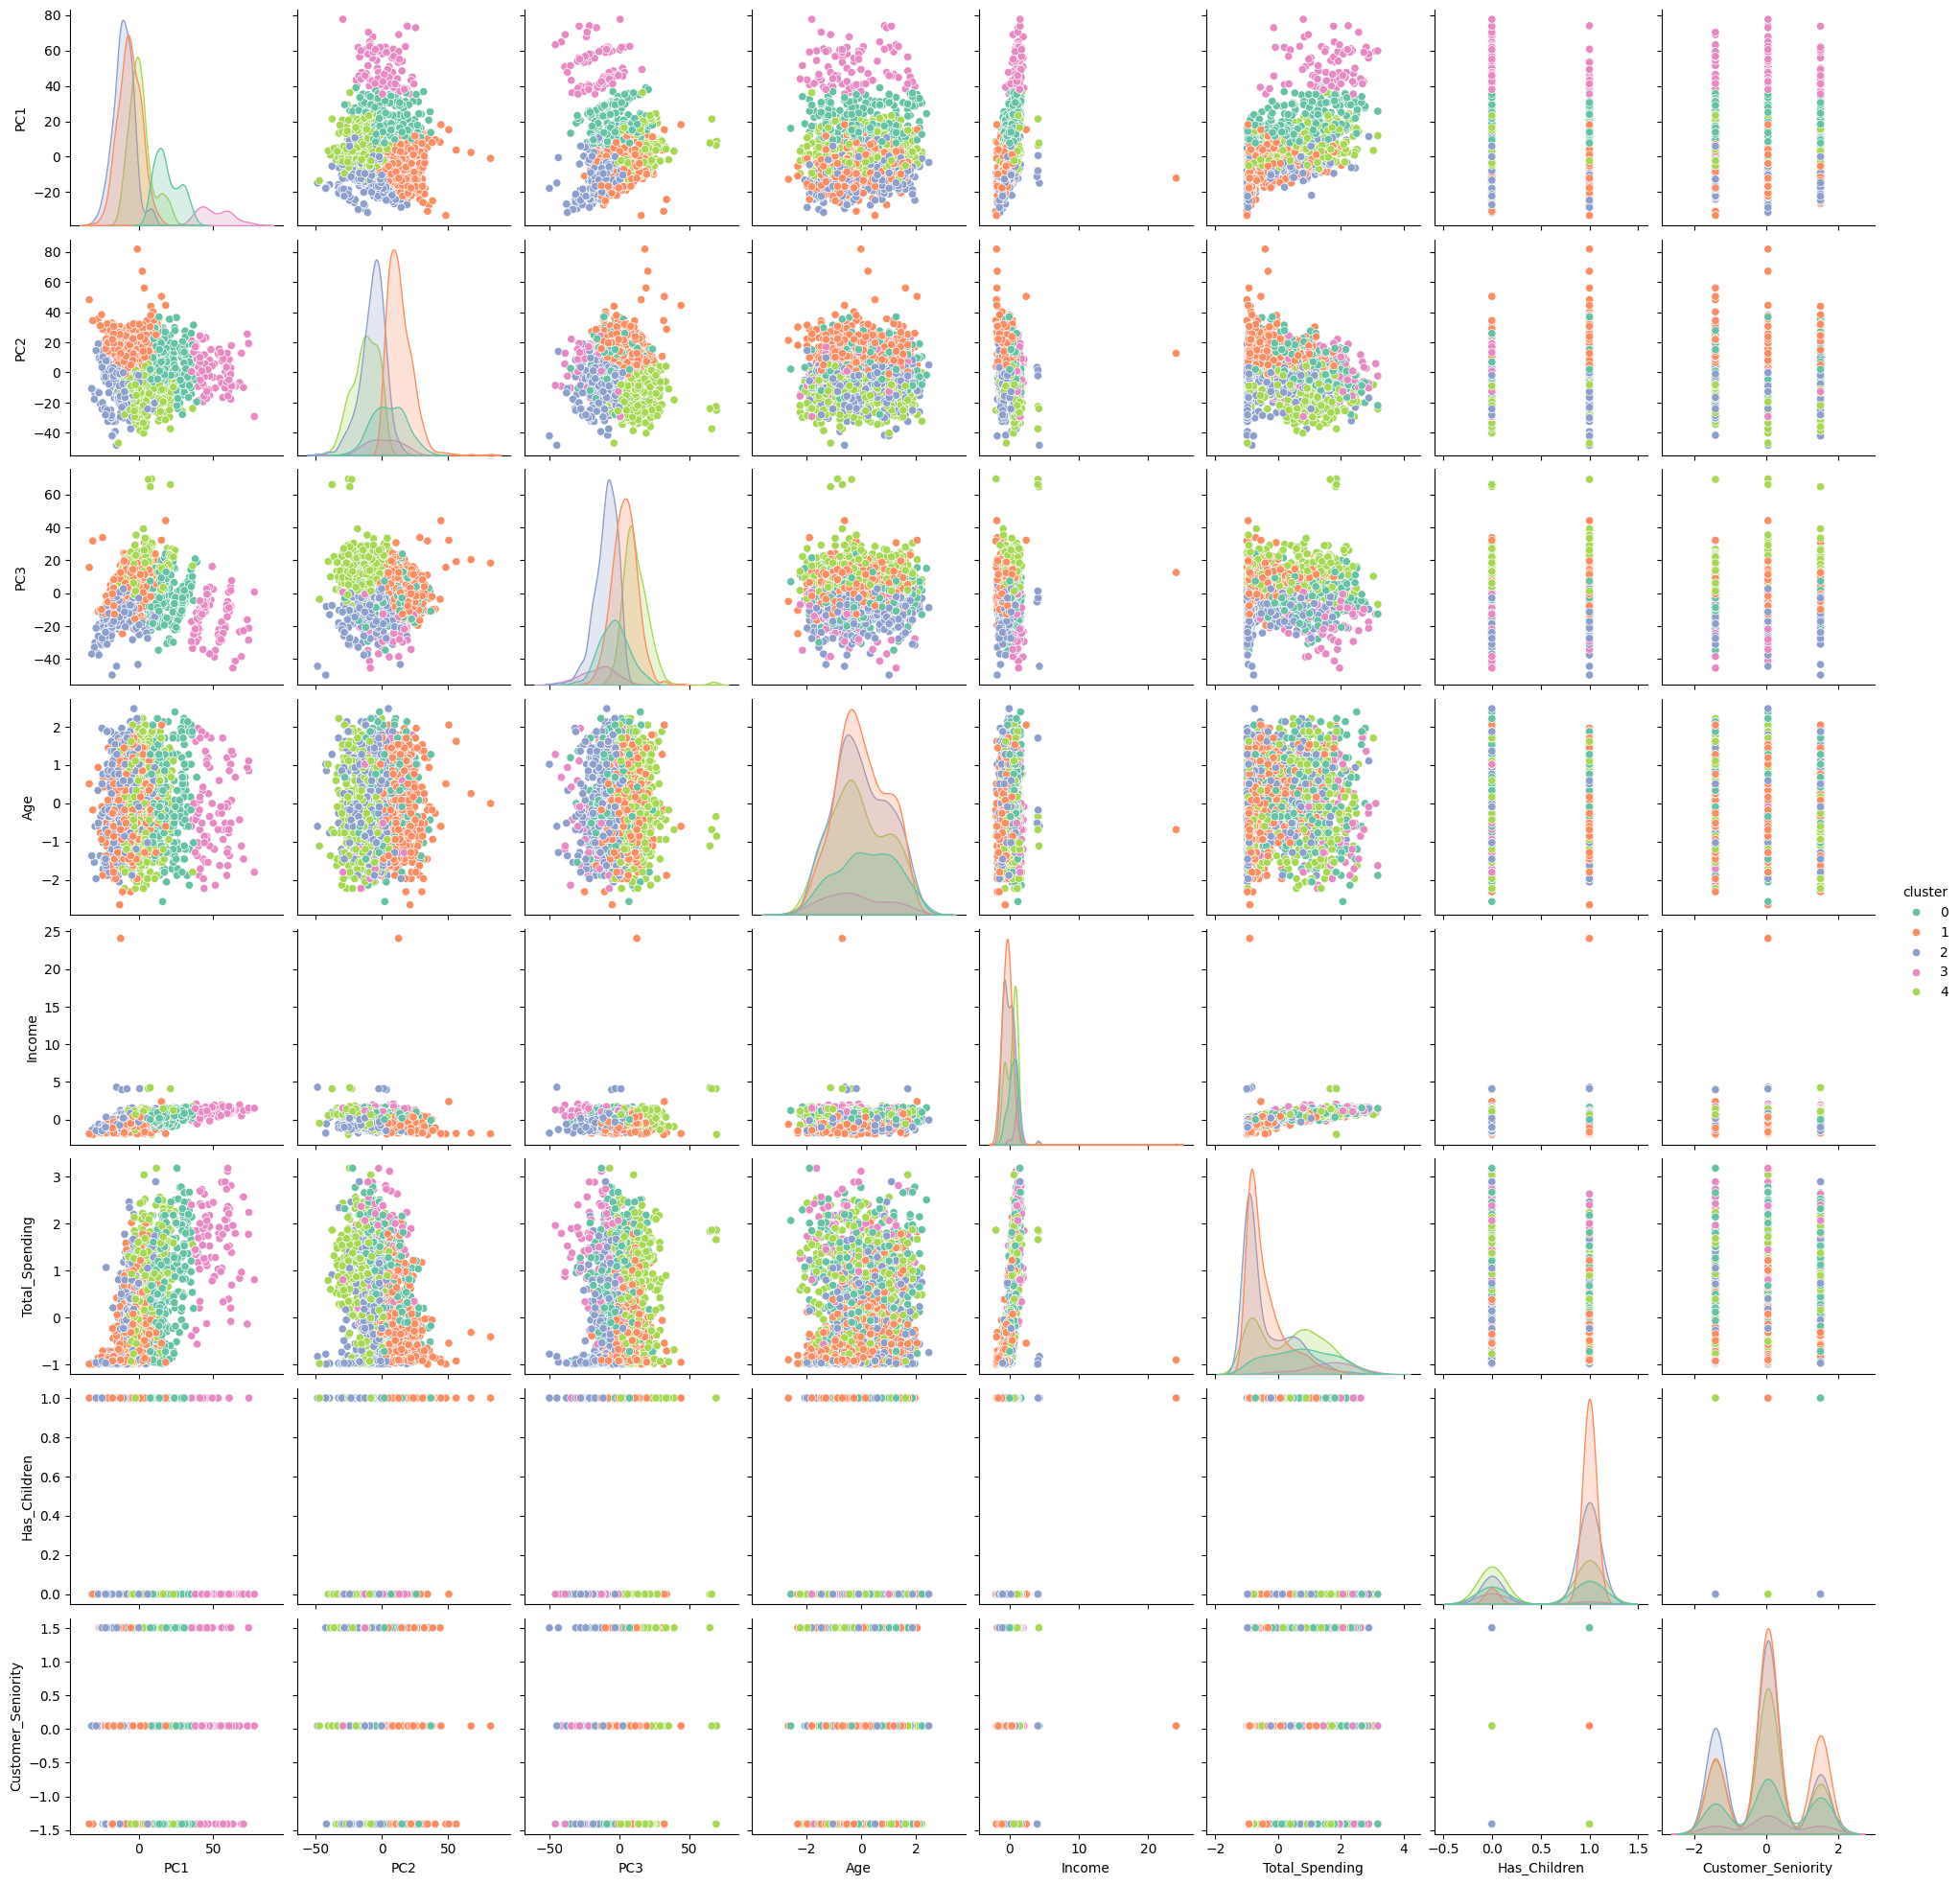

In [21]:

kmeans = KMeans(n_clusters= 5, random_state=42)  # n_clusters = nombre de clusters 
kmeans.fit(df)
# création de la variable labels qui correspond a chaque point
labels = kmeans.labels_


df['cluster'] = labels

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

## GMM (Gaussian Mixture Model)

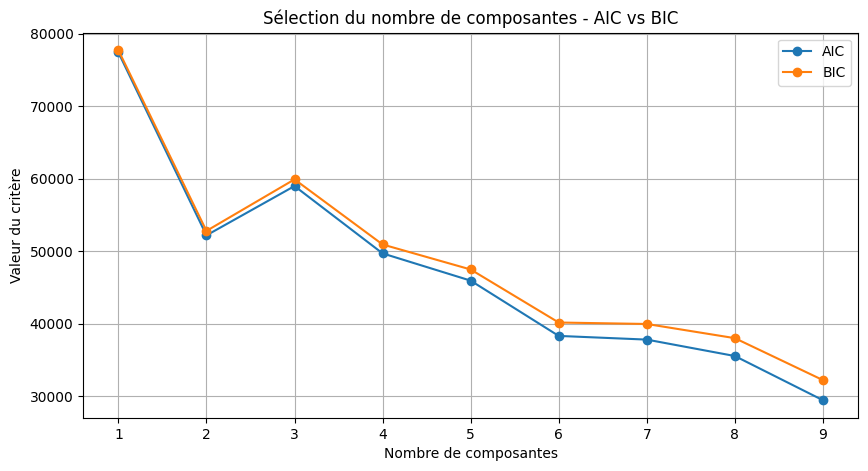

In [22]:
aic = []
bic = []
n_components_range = range(1, 10)

# 3. Test de plusieurs nombres de composantes
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df)
    aic.append(gmm.aic(df))
    bic.append(gmm.bic(df))

# 4. Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Valeur du critère')
plt.title('Sélection du nombre de composantes - AIC vs BIC')
plt.legend()
plt.grid(True)
plt.show()

## 📊 Analyse des résultats AIC/BIC

### **Observations du graphique :**

1. **📉 Tendance générale :** Les deux courbes **diminuent** de K=1 à K=9, ce qui est un bon signe
   
2. **🔍 Points d'inflexion notables :**
   - **AIC** : Diminution forte jusqu'à K=3, puis plus graduelle
   - **BIC** : Diminution marquée jusqu'à K=3, légère remontée à K=4-5, puis baisse continue

3. **⚖️ Comparaison AIC vs BIC :**
   - **AIC** semble continuer à baisser même à K=9 (favorise plus de composantes)
   - **BIC** montre une stabilisation relative autour de K=7-9 (préfère la simplicité)

### **🎯 Recommandations basées sur ces résultats :**

- **K=3** : Premier point d'inflexion significatif (bon compromis simplicité/performance)
- **K=7-9** : Zone de stabilisation du BIC (modèles plus complexes mais stables)

### **🔄 Prochaine étape :** 
Utilisons le **Silhouette Score** pour trancher entre ces candidats et valider le choix optimal !

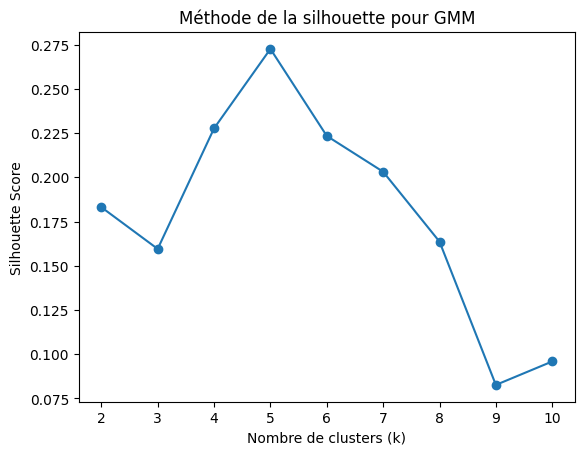

Silhouette Score optimal à K = 5
Score maximal: 0.273


In [23]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42) 
    gmm.fit(df)
    score = silhouette_score(df, gmm.predict(df)) 
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode de la silhouette pour GMM")
plt.show()

print(f"Silhouette Score optimal à K = {k_range[silhouette_scores.index(max(silhouette_scores))]}")
print(f"Score maximal: {max(silhouette_scores):.3f}")

## test avec avec k=8



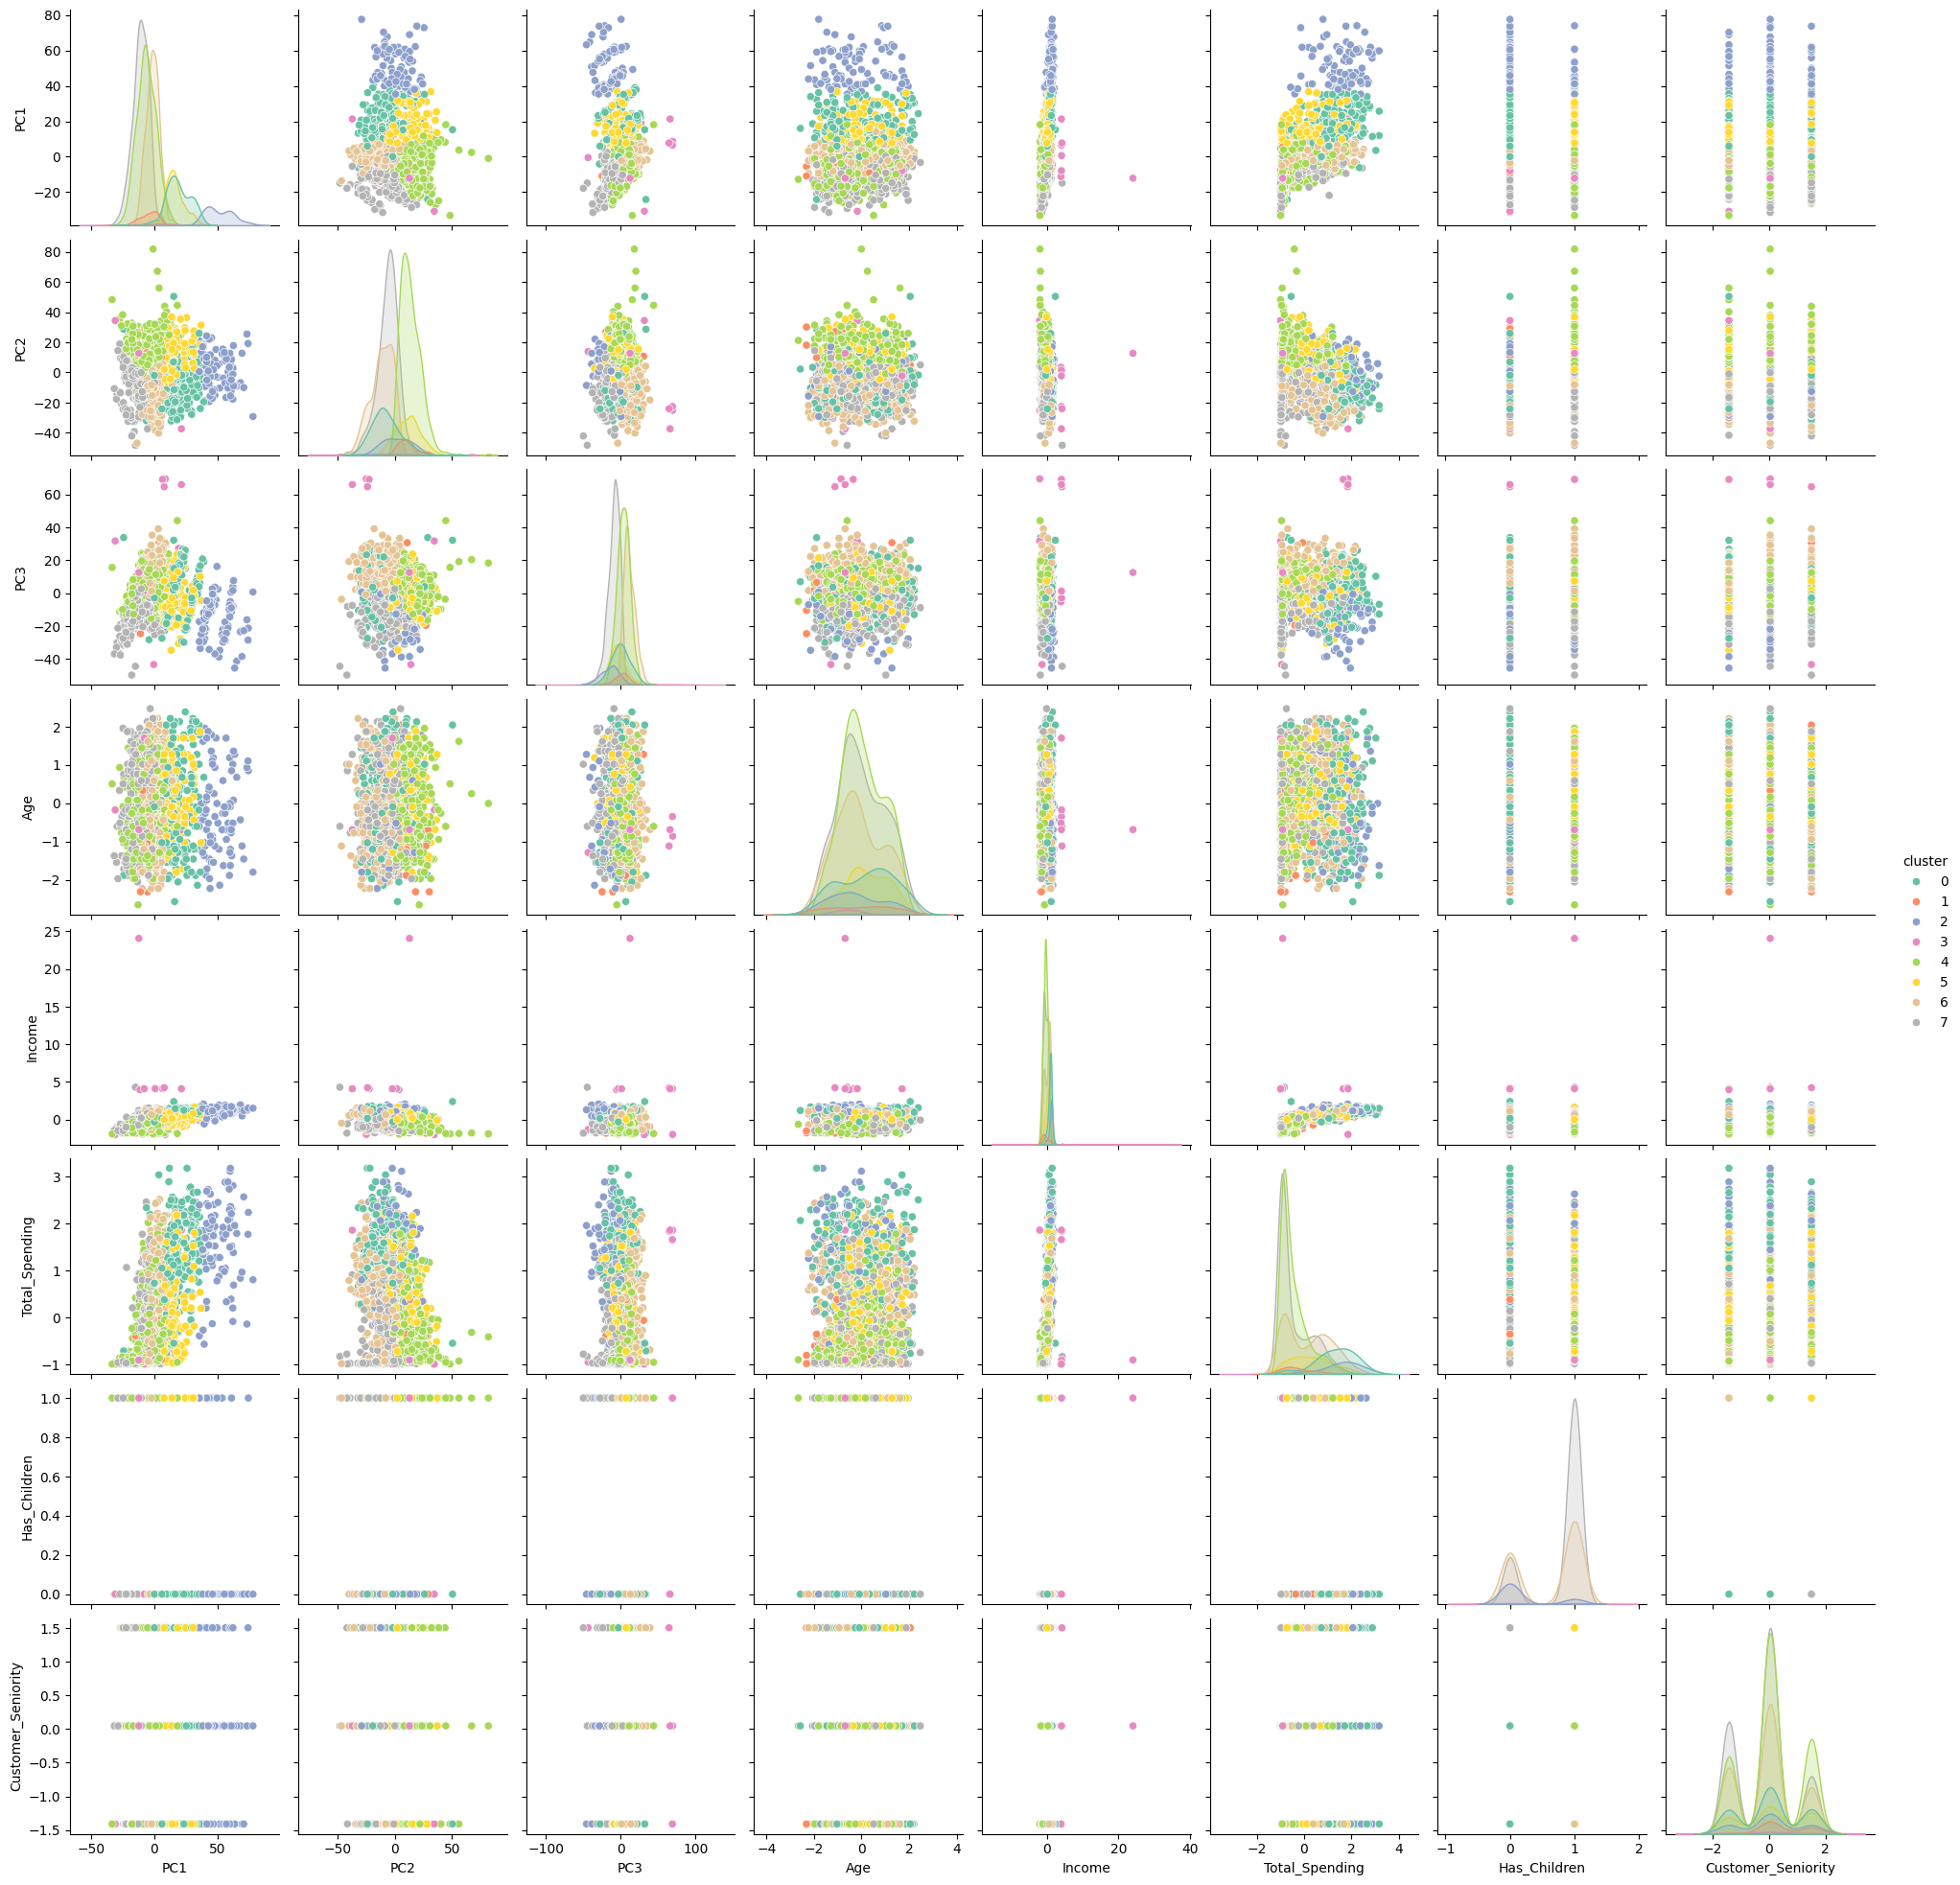

In [24]:
gmm = GaussianMixture(n_components= 8, random_state=42)   
labels = gmm.fit_predict(df)
# création de la variable labels qui correspond a chaque point

df['cluster'] = labels

# Tri du DataFrame par cluster pour une meilleure lisibilité
df_sorted = df.sort_values('cluster').reset_index(drop=True)

# Sauvegarde du DataFrame trié avec les clusters GMM
df_sorted.to_csv('data/clusters/gmm.csv', index=False)

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

In [25]:
df.groupby('cluster').mean(numeric_only=True)

PC1        PC2        PC3       Age    Income  Total_Spending  \
cluster                                                                        
0        18.846484  -7.672249   0.033088  0.165555  0.818066        1.333543   
1        -4.373700  10.833280   1.552532 -0.121945 -0.449422       -0.134713   
2        51.153288   1.595720 -14.872877 -0.213702  1.117467        1.589059   
3         0.151209  -4.472595  26.427969 -0.417888  3.872705        0.049169   
4        -6.297120  13.549172   3.710396  0.025906 -0.391737       -0.436706   
5        16.456920  11.175553  -4.361901  0.174296  0.162963        0.298479   
6        -1.364354 -11.790223  11.623390 -0.104350  0.174190        0.166026   
7       -10.840776  -6.713310  -9.297133 -0.005145 -0.258988       -0.440309   

         Has_Children  Customer_Seniority  
cluster                                    
0            0.000000            0.054960  
1            0.000000            0.464150  
2            0.197674            0.047442  
3            0.454545           -0.085147  
4            1.000000            0.115572  
5            1.000000            0.145326  
6            0.617866           -0.071987  
7            0.814488           -0.163857

In [26]:
df['cluster'].value_counts().sort_index()



cluster
0    194
1     42
2     86
3     11
4    578
5    149
6    403
7    566
Name: count, dtype: int64

## test avec k=5

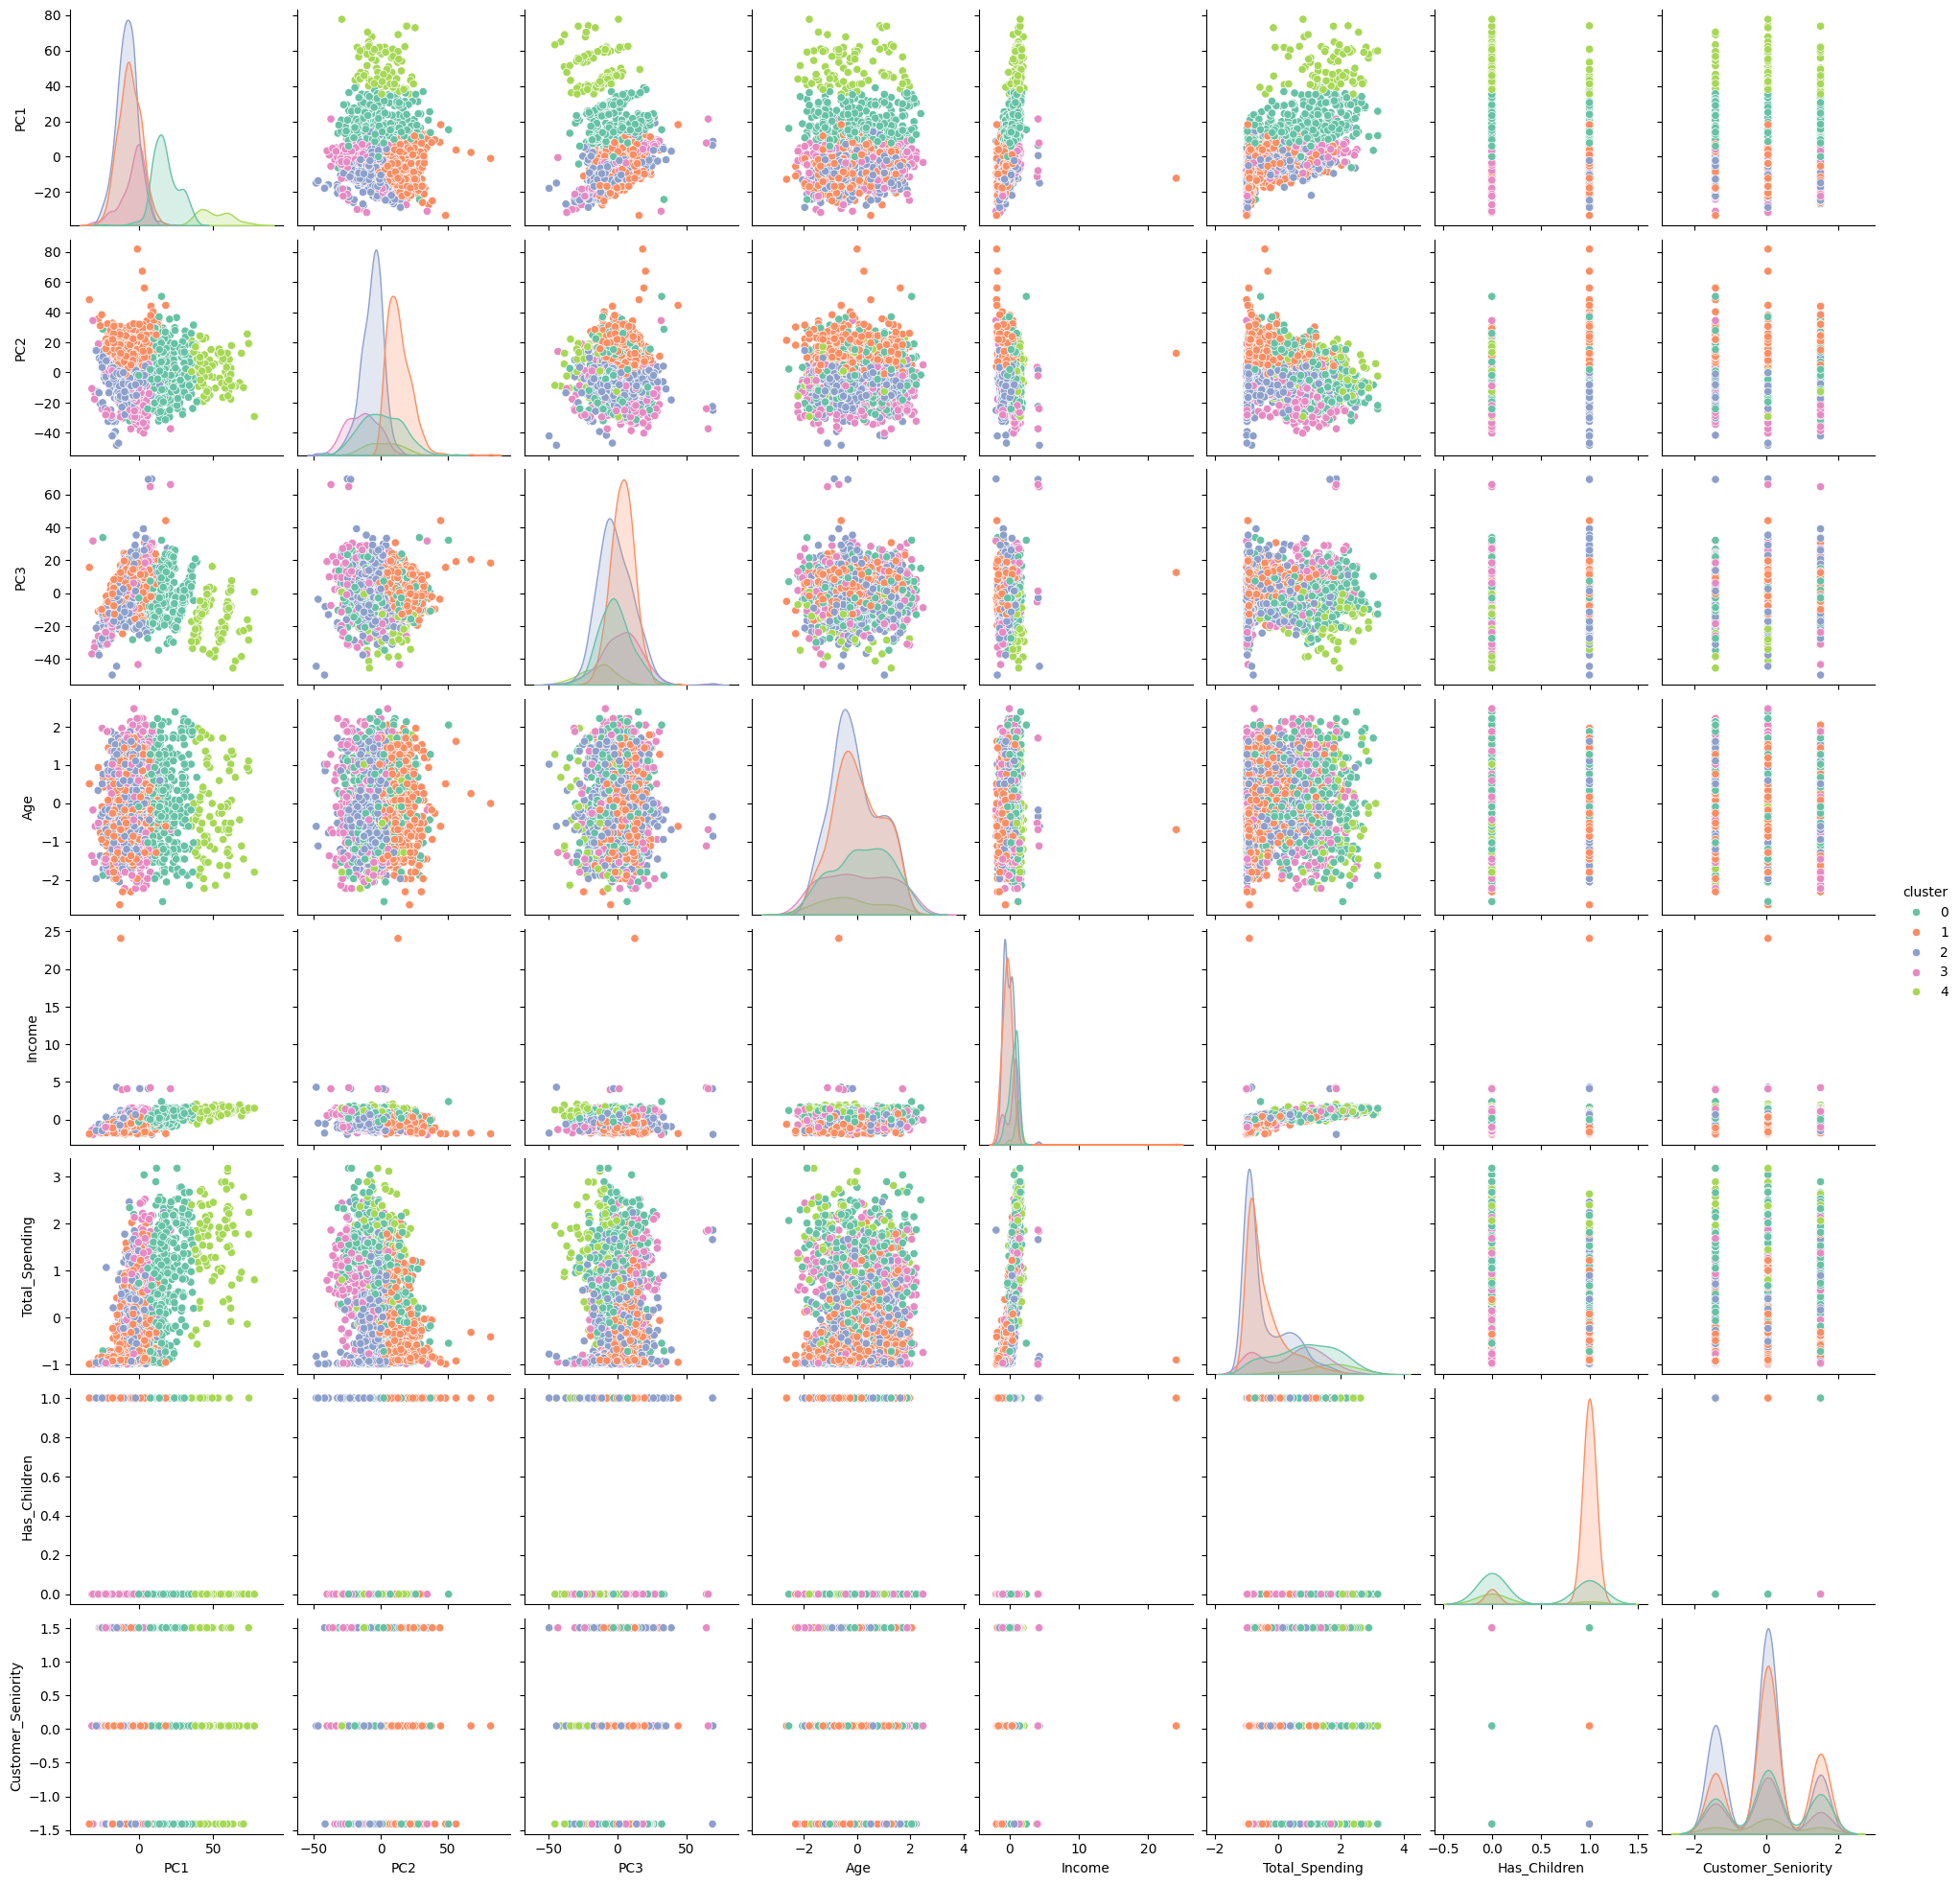

In [27]:
gmm = GaussianMixture(n_components= 5, random_state=42)   
labels = gmm.fit_predict(df)
# création de la variable labels qui correspond a chaque point

df['cluster'] = labels

# Tri du DataFrame par cluster pour une meilleure lisibilité
df_sorted = df.sort_values('cluster').reset_index(drop=True)

# Sauvegarde du DataFrame trié avec les clusters GMM
df_sorted.to_csv('data/clusters/gmm.csv', index=False)

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

In [31]:
import plotly.express as px

fig = px.scatter_3d(df,
                    x='PC1', 
                    y='PC2', 
                    z='PC3',
                    color='cluster',
                    color_discrete_sequence=px.colors.qualitative.Set2,
                    title="3D Cluster Visualization")
fig.show()

In [28]:
df.groupby('cluster').mean(numeric_only=True)



PC1        PC2        PC3       Age    Income  Total_Spending  \
cluster                                                                        
0        17.808452   0.515280  -1.876105  0.169352  0.533488        0.883909   
1        -6.176421  13.364129   3.578720  0.014754 -0.356275       -0.417034   
2        -7.963546  -6.897727  -1.463613 -0.080269 -0.207510       -0.413122   
3        -3.720573 -13.917435   2.812097  0.031852  0.340832        0.430595   
4        51.153288   1.595720 -14.872877 -0.213702  1.117467        1.589059   

         Has_Children  Customer_Seniority  
cluster                                    
0            0.434402            0.094215  
1            0.932367            0.139037  
2            1.000000           -0.146613  
3            0.000000           -0.068136  
4            0.197674            0.047442

In [29]:
df['cluster'].value_counts().sort_index()

cluster
0    343
1    621
2    714
3    265
4     86
Name: count, dtype: int64

il y a peut etre trop de colonne , nous n'arrivons pas a donner de noms aux groupes formés , peut etre que le nombre de cluster devrait etre 3 car la il y a 2 cluster sur 5 qui sont a 8 et 1 lignes sur 2500. Le csv , ca serait peut etre mieux de garder le mien pour vraiment savoir quelle type de données sont utilisé pour créer les clusters 